In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

## Exercise 1: Diatomic molecule

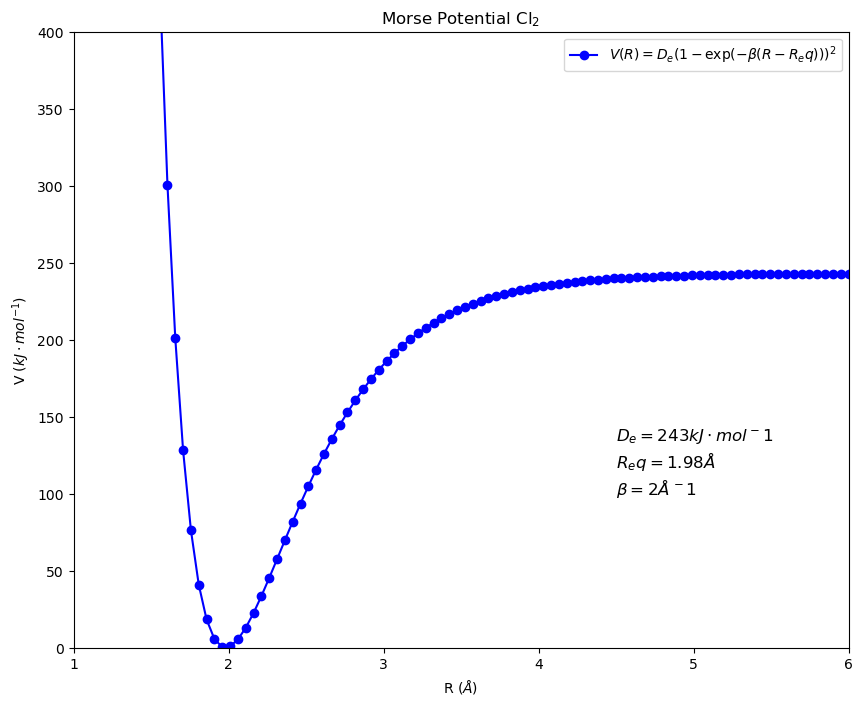

In [2]:

R = np.linspace(1, 6, 100)

# Parameters
R_eq = 1.98 # equilibrium radius (Angstrom)
D_e = 243 # potentiel well depth (kJ/mol)
beta = 2 # (Angstrom^-1)

V = D_e*(1 - np.exp(-beta*(R-R_eq)))**2

#Plot

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(R, V, c = "blue", marker="o", label=r"$V(R) = D_e(1-\exp(-\beta(R-R_eq)))^2$")
ax.set_xlabel("R ($\AA$)")
ax.set_ylabel("V ($kJ \cdot mol^{-1}$)")
ax.axis([1, 6, 0, 400])
plt.title("Morse Potential Cl$_2$")

# adding parameters to plot
plt.text(0.7, 0.3, 
         fr"$D_e = {D_e} kJ\cdot mol^{-1}$"+"\n"+fr"$R_eq = {R_eq} \AA $"+"\n"+fr"$\beta = {beta} \AA^{-1}$",
         horizontalalignment='left',
         verticalalignment='center',
         transform=ax.transAxes,
         fontsize=12)

plt.legend()
plt.savefig("figs/Morse_Potential_Cl$_2.png", dpi=300, bbox_inches="tight")
plt.show()



## Exercise 2 : Data retrieval and visualisation

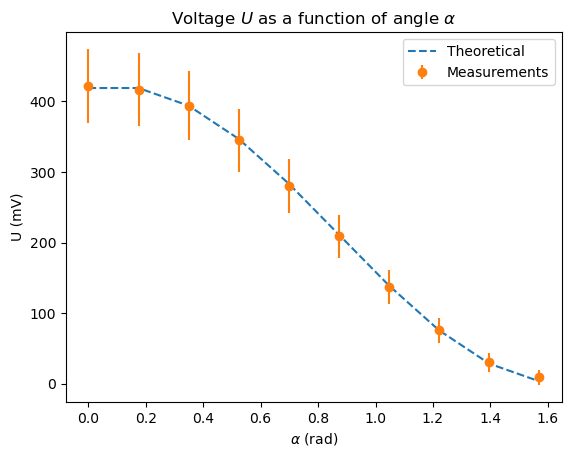

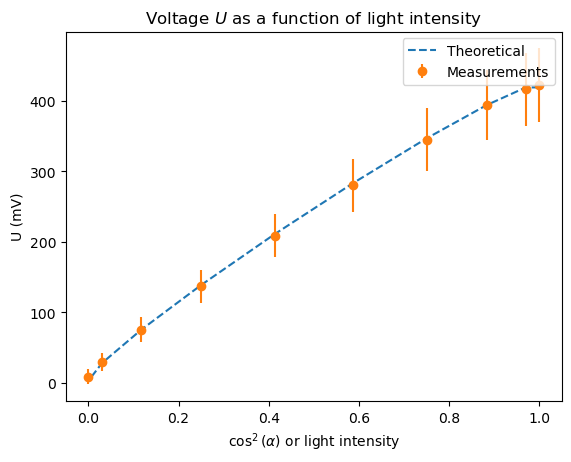

In [3]:
data = pd.read_csv('data/dataMalus.csv').to_numpy()
alpha, U = data.transpose()

a_0 = -5
# account for the systematic error
U_theo = U[0]*np.cos(np.deg2rad(alpha+a_0))**2
plt.plot(np.deg2rad(alpha), U_theo, label='Theoretical', linestyle="dashed")
#plt.plot(np.deg2rad(alpha), U, label="Measurements")

error = [(0.1*U[i] + 10.) for i in range(len(U))]
plt.errorbar(x=np.deg2rad(alpha),y=U, label="Measurements", yerr=error, fmt='o')
plt.legend()
plt.ylabel("U (mV)")
plt.xlabel(r"$\alpha$ (rad)")
plt.title(r"Voltage $U$ as a function of angle $\alpha$")
plt.show()


cos_axis = np.cos(np.deg2rad(alpha))**2

plt.plot(cos_axis, U_theo, label='Theoretical', linestyle="dashed")

error = [(0.1*U[i] + 10.) for i in range(len(U))]
plt.errorbar(x=cos_axis,y=U, label="Measurements", yerr=error, fmt='o')
plt.legend()
plt.ylabel("U (mV)")
plt.xlabel(r"$\cos^2(\alpha)$ or light intensity")
plt.title(r"Voltage $U$ as a function of light intensity")
plt.show()


## Exercise 3: Disgusting weather in Seattle

               date  precipitation        tmax        tmin
count  3.650000e+02     365.000000  365.000000  365.000000
mean   2.014067e+07      33.775342   16.995890    8.662466
std    3.454755e+02      67.815757    7.268724    4.974643
min    2.014010e+07       0.000000   -1.600000   -6.000000
25%    2.014040e+07       0.000000   11.100000    5.600000
50%    2.014070e+07       0.000000   16.100000    9.400000
75%    2.014100e+07      36.000000   22.200000   12.800000
max    2.014123e+07     467.000000   35.600000   17.800000
(365, 4)

Summer data
               date  precipitation       tmax       tmin
count  9.400000e+01      94.000000  94.000000  94.000000
mean   2.014079e+07       7.851064  25.773404  14.171277
std    9.215234e+01      33.347295   3.907923   1.547500
min    2.014062e+07       0.000000  17.800000  10.000000
25%    2.014071e+07       0.000000  22.800000  13.300000
50%    2.014081e+07       0.000000  25.600000  13.900000
75%    2.014083e+07       0.000000  28.900000  1

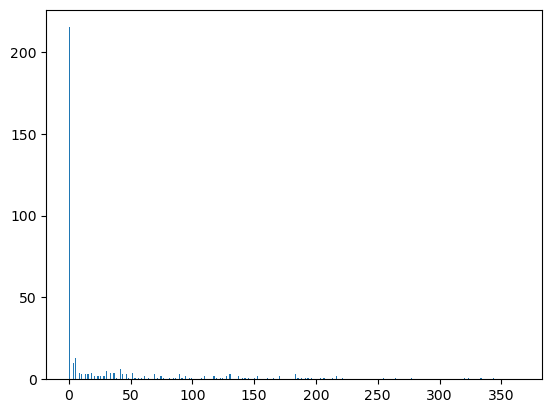

In [75]:
sedata = pd.read_csv('data/Seattle2014.csv').to_numpy()
unmodified = pd.read_csv('data/Seattle2014.csv')
STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03 = sedata.transpose()

#DATE
#PRCP
#TMAX
#TMIN
tmax = np.array(TMAX)
tmax = tmax/10#(tmax-32)*5/9

tmin = np.array(TMIN)
tmin = tmin/10#(tmin-32)*5/9




lessdata = [DATE, PRCP, tmax, tmin]
table = DataFrame(np.transpose(lessdata), columns=['date', 'precipitation', 'tmax', 'tmin'])
#print(table)

#print(pd.read_csv('data/Seattle2014.csv')['TMAX'].describe())
#print()

# something weird with the format, pandas is interpreting the columns as object and not float

table = table.astype(float)
print(table.describe())
#print(table)


#plt.scatter(table['date'], table['tmax'])




summervals = {"date": [], "precipitation": [], "tmax": [], "tmin": []}

print(table.shape)
for i in range(table.shape[0]):
    # after 20th of June and before 23rd of September is summer
    if table['date'][i] >= 20140621 and table['date'][i] < 20140923 :
        summervals['date'].append(table['date'][i])
        summervals['precipitation'].append(table['precipitation'][i])
        summervals['tmax'].append(table['tmax'][i])
        summervals['tmin'].append(table['tmin'][i])


summer_table = DataFrame(summervals, columns=['date', 'precipitation', 'tmax', 'tmin'])
print("\nSummer data")
print(summer_table.describe())

# rain
print(f"total rain in 2014: {sum(table['precipitation'])/10} cm")

# better way to select rows with a condition
summer_table2 = table.loc[(table['date'] > 20140620) &(table['date'] > 20140923)]
print(f"SUMMER TABLE 2 {summer_table2}")


precip = table['precipitation'].to_numpy()
#print(table['precipitation'].to_numpy)


plt.hist(precip, bins=365, range=(0, 365))
plt.show()
#print(serie.describe())

#print(type(unmodified))
#print(table.dtypes)

#print("test")
# example numbers
#dataset = pd.DataFrame(data=[2 ** 64, 2 ** 65, 2 ** 66], columns=['bignum'])
#print(dataset.describe())
